In [1]:
from Algorithm import Gaussian_Process
from Algorithm import LA_Bayessian_Quadrature
from Algorithm import Mesh
from Algorithm import Kernels
import Target_Function as tf

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

plt.rcParams['figure.figsize'] = [12, 6]


In [2]:
opt1 = tf.Option('call', 0, 95, 0.25, 1.0,  15, 1)
portfolio = tf.OptionPortfolio(0.03, 50, 150, [opt1])
func = portfolio.target_function

print(f"Analytic portfolio Δ : {func([portfolio.alter(98.0)]):,.4f}")

Analytic portfolio Δ : 9.6611


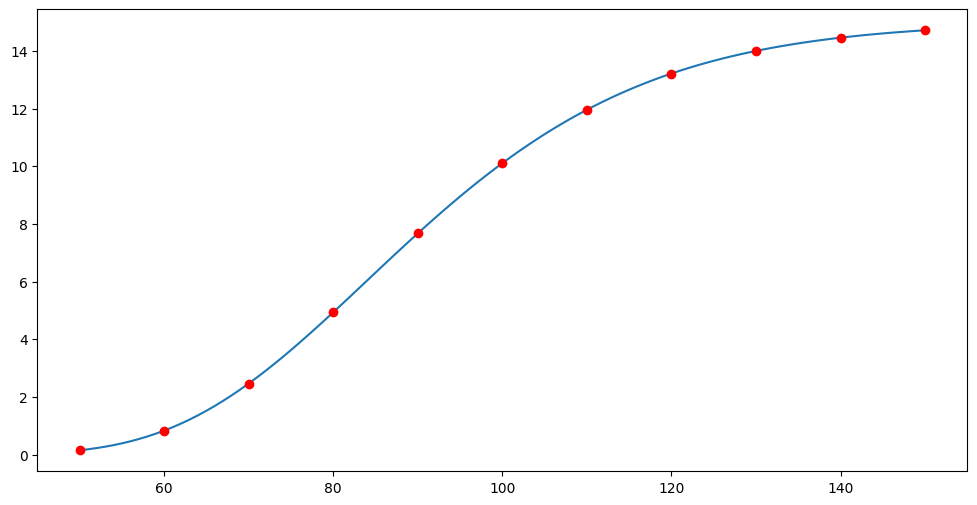

In [13]:
a = np.linspace(50, 150, 101)
b = np.zeros_like(a)
for i in range(101):
    b[i] = func(portfolio.alter(a[i]))
plt.plot(a,b)
X = np.around(np.array(np.meshgrid(np.linspace(0,1,11), indexing='ij')).reshape(1,-1).T,1)
Y = []
for i in range(11):
    Y.append(func(X[i]))
    plt.plot(portfolio.to_initial(X[i]),Y[i],'ro')

plt.show()

In [4]:
beta = np.array([-0.33, -1, -0.9, -1, -1.2, -2, -2.6, -2, -1.2, -1, -1.1, -1])

In [5]:
GP = Gaussian_Process.GaussianProcess(Kernels.K_lin_mat2_10,beta,X,Y) # Define Gaussian process

In [7]:
GPs_mat1,int_params_mat1 = LA_Bayessian_Quadrature.ABC(func,GP,Mesh.get_points,30,[30,1])


Step:  1  /  31
Step:  2  /  31
Step:  3  /  31
Step:  4  /  31
Step:  5  /  31
Step:  6  /  31
Step:  7  /  31
Step:  8  /  31
Step:  9  /  31
Step:  10  /  31
Step:  11  /  31
Step:  12  /  31
Step:  13  /  31
Step:  14  /  31
Step:  15  /  31
Step:  16  /  31
Step:  17  /  31
Step:  18  /  31
Step:  19  /  31
Step:  20  /  31
Step:  21  /  31
Step:  22  /  31
Step:  23  /  31
Step:  24  /  31
Step:  25  /  31
Step:  26  /  31
Step:  27  /  31
Step:  28  /  31
Step:  29  /  31
Step:  30  /  31
Step:  31  /  31


In [8]:
final_GP = GPs_mat1[-1]
def bs_delta(S, K=95, T=1.0, sigma=0.25, r=0.03, opt_type='call'):
    if T <= 0 or sigma <= 0:
        return 0.0
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if opt_type == 'call':
        return norm.cdf(d1)
    else:
        return norm.cdf(d1) - 1.0

def scaled_bs_delta(x):
    S = 50 + 100 * x
    return 15 * bs_delta(S)


I_true, err = quad(scaled_bs_delta, 0, 1)
print("True value =", I_true)
print("Calculated value =", int_params_mat1[-1])

True value = 8.7080319904192
Calculated value = [8.70812413e+00 5.17102698e-08]
